In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
games = pd.read_csv("/datasets/games.csv")

In [25]:
games.shape

(16715, 13)

In [28]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,User_Score_Fixed,Year_Date
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,8.0,2006-01-01
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,1985-01-01
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,8.3,2008-01-01
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,8.0,2009-01-01
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,1996-01-01


In [3]:
games["Year_Date"] = pd.to_datetime(games["Year_of_Release"], format="%Y")

In [15]:
games.dtypes

Name                        object
Platform                    object
Year_of_Release            float64
Genre                       object
NA_sales                   float64
EU_sales                   float64
JP_sales                   float64
Other_sales                float64
Critic_Score               float64
User_Score                  object
Rating                      object
User_Score_Fixed           float64
Year_Date           datetime64[ns]
dtype: object

In [7]:
games["User_Score"].value_counts().sort_index()

0         1
0.2       2
0.3       2
0.5       2
0.6       2
       ... 
9.4      11
9.5       6
9.6       2
9.7       1
tbd    2424
Name: User_Score, Length: 96, dtype: int64

In [6]:
games["User_Score_Fixed"] = np.where(
    games["User_Score"] == "tbd",
    -1,
    games["User_Score"]
)
games["User_Score_Fixed"] = games["User_Score_Fixed"].astype("float")

games[["Critic_Score", "User_Score_Fixed"]].describe()

,Critic_Score,User_Score_Fixed
count,8137.000000,10014.000000
mean,68.967679,5.158288
std,13.938165,3.717310
min,13.000000,-1.000000
25%,60.000000,2.400000
50%,71.000000,6.900000
75%,79.000000,8.000000
max,98.000000,9.700000


In [16]:
games.dtypes

Name                        object
Platform                    object
Year_of_Release            float64
Genre                       object
NA_sales                   float64
EU_sales                   float64
JP_sales                   float64
Other_sales                float64
Critic_Score               float64
User_Score                  object
Rating                      object
User_Score_Fixed           float64
Year_Date           datetime64[ns]
dtype: object

In [7]:
games["Rating"].value_counts(dropna=False)

NaN     6766
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

<AxesSubplot:xlabel='Year_Date'>

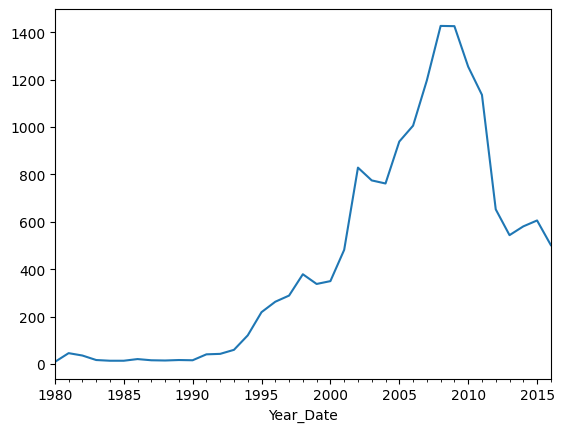

In [23]:
games.groupby("Year_Date")["Name"].count().plot(kind="line")

<AxesSubplot:xlabel='Year_Date'>

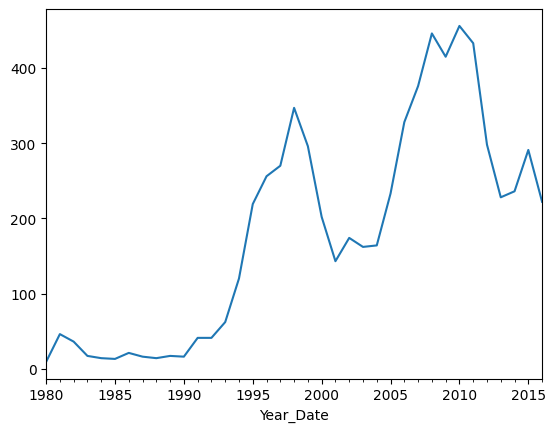

In [22]:
games["Rating"].isna().groupby(games["Year_Date"]).sum().plot(kind="line")

<AxesSubplot:xlabel='Year_Date'>

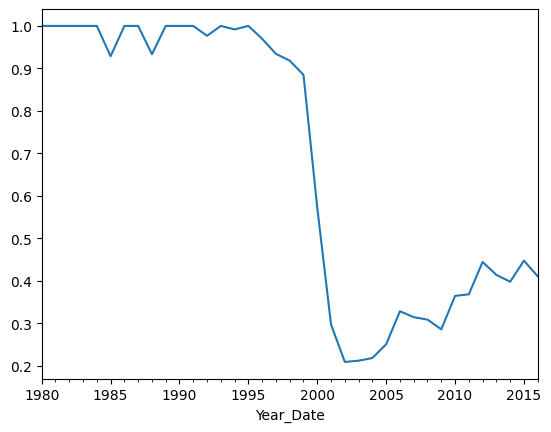

In [43]:
games["User_Score"].isna().groupby(games["Year_Date"]).mean().plot(kind="line")

In [30]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Name              16713 non-null  object        
 1   Platform          16715 non-null  object        
 2   Year_of_Release   16446 non-null  float64       
 3   Genre             16713 non-null  object        
 4   NA_sales          16715 non-null  float64       
 5   EU_sales          16715 non-null  float64       
 6   JP_sales          16715 non-null  float64       
 7   Other_sales       16715 non-null  float64       
 8   Critic_Score      8137 non-null   float64       
 9   User_Score        10014 non-null  object        
 10  Rating            9949 non-null   object        
 11  User_Score_Fixed  10014 non-null  float64       
 12  Year_Date         16446 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(5)
memory usage: 1.7+ MB


In [29]:
games.isna().sum()

Name                   2
Platform               0
Year_of_Release      269
Genre                  2
NA_sales               0
EU_sales               0
JP_sales               0
Other_sales            0
Critic_Score        8578
User_Score          6701
Rating              6766
User_Score_Fixed    6701
Year_Date            269
dtype: int64

<AxesSubplot:xlabel='Year_Date'>

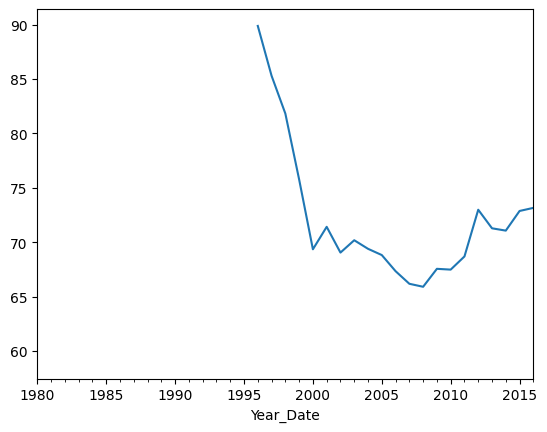

In [31]:
games.groupby("Year_Date")["Critic_Score"].mean().plot(kind="line")

<AxesSubplot:xlabel='Year_Date'>

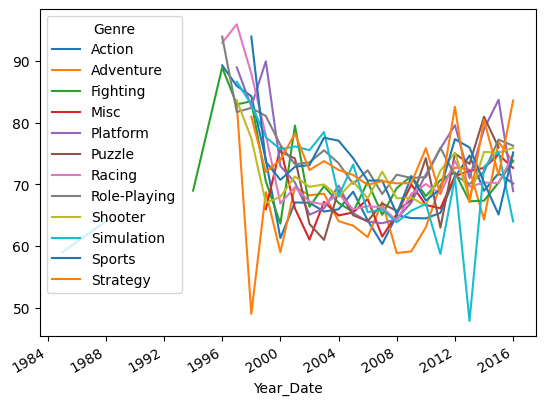

In [34]:
games.pivot_table(index="Year_Date", columns="Genre", values="Critic_Score", aggfunc="mean").plot(kind="line")

In [41]:
games.dropna(subset=["Critic_Score", "User_Score"]).isna().sum()

Name                  0
Platform              0
Year_of_Release     149
Genre                 0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score          0
User_Score            0
Rating               74
User_Score_Fixed      0
Year_Date           149
dtype: int64

In [8]:
games["Total_sales"] = games["NA_sales"] + games["EU_sales"] + games["JP_sales"] + games["Other_sales"]

In [45]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,User_Score_Fixed,Year_Date,Total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,8.0,2006-01-01,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,1985-01-01,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,8.3,2008-01-01,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,8.0,2009-01-01,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,1996-01-01,31.38


In [47]:
games.query("Year_Date <= '1993-01-01'").shape

(367, 14)

<AxesSubplot:xlabel='Year_Date'>

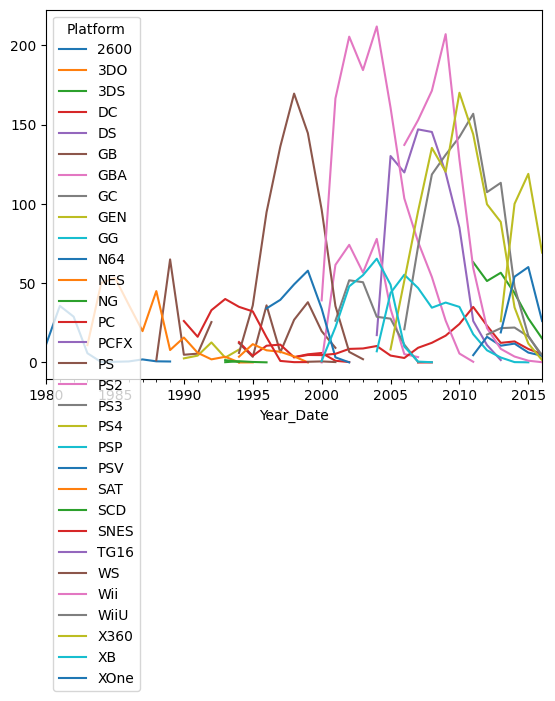

In [49]:
games.pivot_table(index="Year_Date", columns="Platform", values="Total_sales", aggfunc="sum").plot(kind="line")

<AxesSubplot:xlabel='Year_Date'>

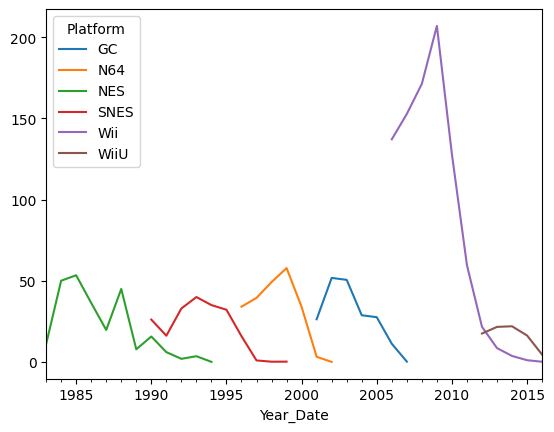

In [85]:
nintendo_platforms = ["NES", "SNES", "N64", "GC", "Wii", "WiiU"]

games[games["Platform"].isin(nintendo_platforms)].pivot_table(index="Year_Date",
                                                              columns="Platform",
                                                              values="Total_sales",
                                                              aggfunc="sum").plot(kind="line")

In [ ]:
# XBox: XB, X360, XOne
# PS: PS, PS2, PS3, PS4
# PS portátil: PSP, PSV
# Nintendo: NES, SNES, N64, GC, Wii, WiiU
# Nintendo portátil: GB, GC, GBA, DS, 3DS

<AxesSubplot:xlabel='Year_Date'>

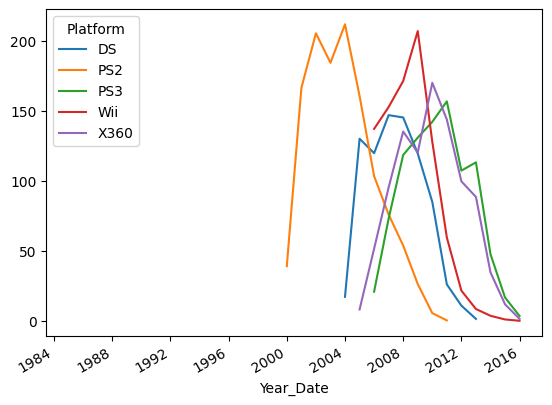

In [9]:
top_platforms = list(games.groupby("Platform")["Total_sales"].sum().sort_values().tail(5).index)

(
    games[games["Platform"].isin(top_platforms)]
    .pivot_table(index="Year_Date",
                 columns="Platform",
                 values="Total_sales",
                 aggfunc="sum")
    .plot(kind="line")
)

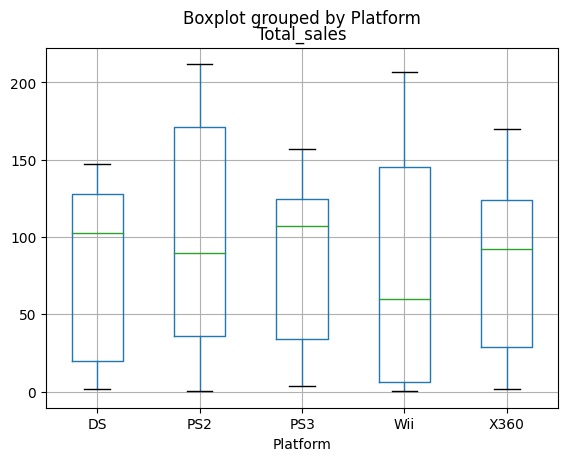

In [82]:
filtered_games = games.query("Year_Date > '1993-01-01'")

sales_by_year = filtered_games.groupby(["Year_Date", "Platform"])["Total_sales"].sum().reset_index()

sales_by_year[sales_by_year["Platform"].isin(top_platforms)][["Total_sales", "Platform"]].boxplot(
    column="Total_sales",
    by="Platform",
)
plt.show()

In [86]:
games.groupby("Platform")["Year_Date"].nunique().sort_values(ascending=False)

Platform
PC      26
GB      13
NES     12
X360    12
PSP     12
PS2     12
Wii     11
DS      11
PS3     11
2600    10
SNES    10
PS      10
XB       9
GBA      8
DC       7
GC       7
N64      7
SAT      6
3DS      6
PSV      6
WiiU     5
GEN      5
NG       4
PS4      4
XOne     4
WS       3
SCD      2
3DO      2
TG16     1
GG       1
PCFX     1
Name: Year_Date, dtype: int64

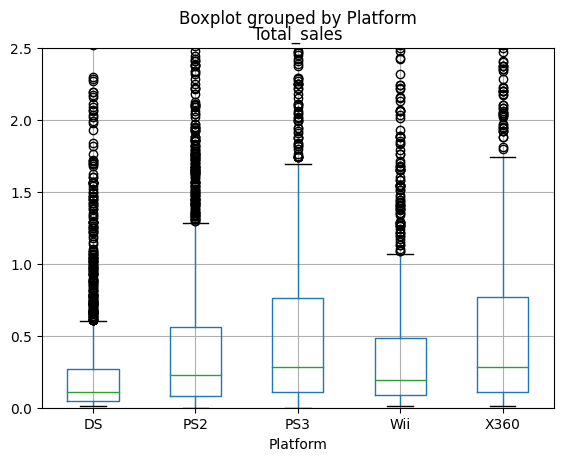

In [88]:
filtered_games[filtered_games["Platform"].isin(top_platforms)].boxplot(
    column="Total_sales",
    by="Platform",
)
plt.ylim(0, 2.5)
plt.show()

<AxesSubplot:xlabel='Platform'>

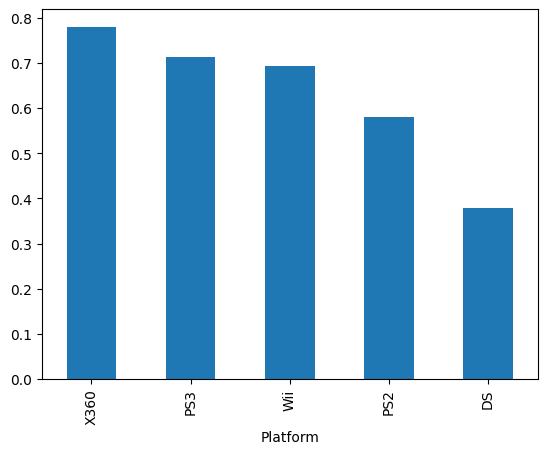

In [94]:
(
    filtered_games[filtered_games["Platform"].isin(top_platforms)]
    .groupby("Platform")["Total_sales"]
    .mean()
    .sort_values(ascending=False)
    .plot(kind="bar")
)

In [96]:
filtered_games.query("Platform == 'XOne'")[["Total_sales", "Critic_Score"]].corr()

# 0.05 < x < 0.2
# 0.2 < x < 0.4
# 0.4 < x < 0.7
# 0.7 < x

,Total_sales,Critic_Score
Total_sales,1.000000,0.416998
Critic_Score,0.416998,1.000000


In [97]:
games.groupby("Name")["Platform"].nunique().sort_values(ascending=False)

Name
Need for Speed: Most Wanted                10
Ratatouille                                 9
Madden NFL 07                               9
LEGO Marvel Super Heroes                    9
FIFA 14                                     9
                                           ..
Import Tuner Challenge (American sales)     1
Impossible Creatures                        1
In Cold Blood                               1
In The Groove                               1
¡Shin Chan Flipa en colores!                1
Name: Platform, Length: 11559, dtype: int64

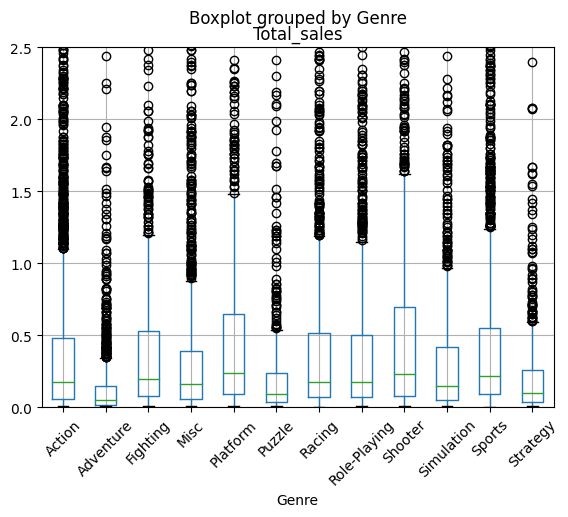

In [104]:
filtered_games.boxplot(
    column="Total_sales",
    by="Genre",
)
plt.ylim(0, 2.5)
plt.xticks(rotation=45)
plt.show()

In [107]:
games["Year_Date"].dt.to_period("M").dt.start_time

0       2006-01-01
1       1985-01-01
2       2008-01-01
3       2009-01-01
4       1996-01-01
           ...    
16710   2016-01-01
16711   2006-01-01
16712   2016-01-01
16713   2003-01-01
16714   2016-01-01
Name: Year_Date, Length: 16715, dtype: datetime64[ns]

In [12]:
games.dtypes

Name                        object
Platform                    object
Year_of_Release            float64
Genre                       object
NA_sales                   float64
EU_sales                   float64
JP_sales                   float64
Other_sales                float64
Critic_Score               float64
User_Score                  object
Rating                      object
Year_Date           datetime64[ns]
User_Score_Fixed           float64
Total_sales                float64
dtype: object

<AxesSubplot:>

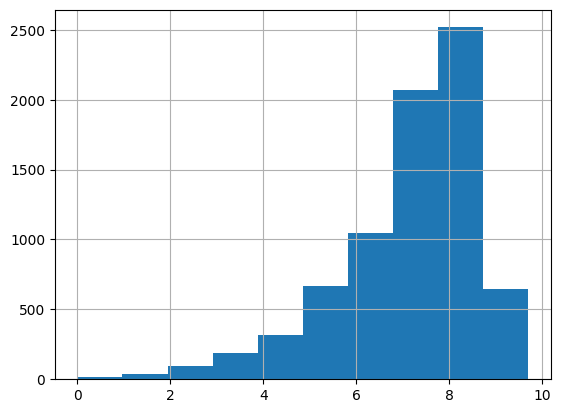

In [19]:
games[games["User_Score"] != 'tbd']["User_Score"].astype("float").hist()

In [23]:
games[games["User_Score"] != 'tbd']["User_Score"].astype("float").median()

7.5

<AxesSubplot:>

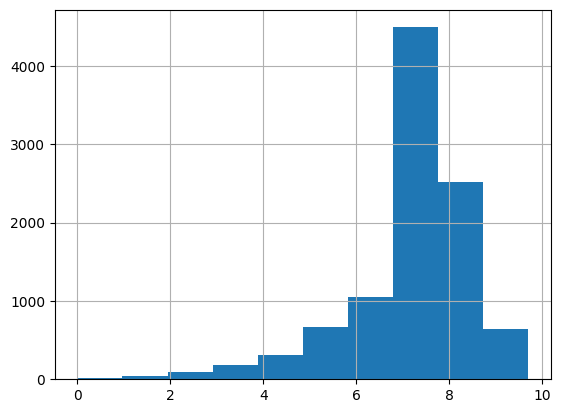

In [22]:
games["User_Score_Fixed"] = np.where(
    games["User_Score"] == 'tbd',
    games[games["User_Score"] != 'tbd']["User_Score"].astype("float").median(),
    games["User_Score"]
)
games["User_Score_Fixed"] = games["User_Score_Fixed"].astype("float")

games["User_Score_Fixed"].hist()

In [26]:
games["User_Score_Fixed"] = np.where(
    games["User_Score"] == 'tbd',
    np.nan,
    games["User_Score"]
)
games["User_Score_Fixed"] = games["User_Score_Fixed"].astype("float")

In [27]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating',
       'Year_Date', 'User_Score_Fixed', 'Total_sales'],
      dtype='object')

In [43]:
games["Rating_reduced"] = np.where(
    games["Rating"].isin(["EC", "K-A", "RP", "AO"]),
    "Other",
    games["Rating"]
)

games["Rating_reduced"].value_counts()

E        3990
T        2961
M        1563
E10+     1420
Other      15
Name: Rating_reduced, dtype: int64

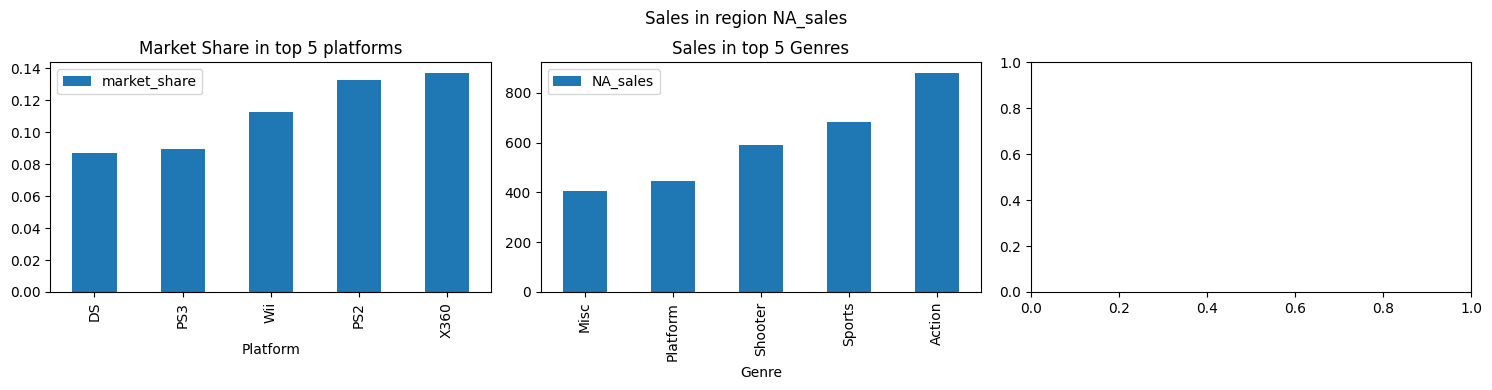

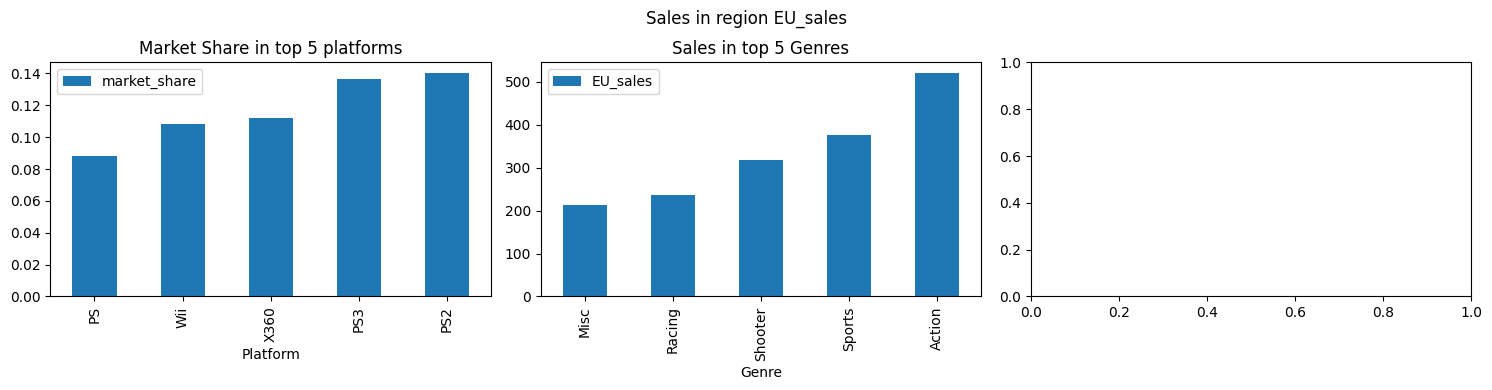

In [41]:

for region in ["NA_sales", "EU_sales"]:

    fig, axes = plt.subplots(ncols=3, figsize=(15, 4))

    # region = "NA_sales"

    sales_by_platform = games.groupby("Platform")[region].sum()
    top_5_patforms = sales_by_platform.sort_values().tail(5).reset_index()
    top_5_patforms["market_share"] = top_5_patforms[region] / sales_by_platform.sum()

    top_5_genres = games.groupby("Genre")[region].sum().sort_values().tail(5).reset_index()

    fig.suptitle(f"Sales in region {region}", y=0.96)

    axes[0].set_title("Market Share in top 5 platforms")
    top_5_patforms.plot(kind="bar", x="Platform", y="market_share", ax=axes[0])

    axes[1].set_title("Sales in top 5 Genres")
    top_5_genres.plot(kind="bar", x="Genre", y=region, ax=axes[1])

    fig.tight_layout(pad=1)

In [44]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating',
       'Year_Date', 'User_Score_Fixed', 'Total_sales', 'Rating_reduced'],
      dtype='object')

In [50]:
from scipy.stats import levene

statistic, p_value = levene(
    games["EU_sales"],
    games["NA_sales"],
)

p_value

2.8530633184743563e-46

In [51]:
print(games["EU_sales"].var(), games["NA_sales"].var())

0.25334965991206565 0.6619506914392441


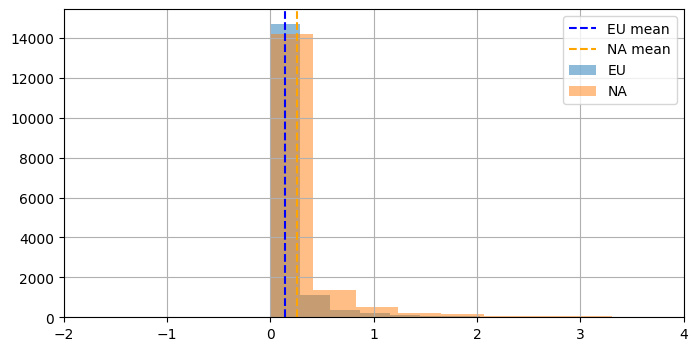

In [65]:
plt.figure(figsize=(8, 4))
games["EU_sales"].hist(label="EU", alpha=0.5, bins=100, ax=plt.gca())
games["NA_sales"].hist(label="NA", alpha=0.5, bins=100, ax=plt.gca())
plt.axvline(x=games["EU_sales"].mean(), ls="--", label="EU mean", color="blue")
plt.axvline(x=games["NA_sales"].mean(), ls="--", label="NA mean", color="orange")
plt.xlim(-2, 4)
plt.legend()
plt.show()

In [53]:
from scipy.stats import ttest_ind

statistic, p_value = ttest_ind(
    games["EU_sales"],
    games["NA_sales"],
    equal_var=True
)

statistic, p_value

(-15.988989473687448, 2.4892882944443467e-57)

In [54]:
statistic, p_value = ttest_ind(
    games["EU_sales"],
    games["NA_sales"],
    equal_var=False
)

statistic, p_value

(-15.988989473687448, 2.7430626468548016e-57)

In [47]:
print(games["NA_sales"].mean(), games["EU_sales"].mean())

0.26337720610230336 0.1450595273706252


# Filtrar Outliers

In [75]:
list(np.linspace(0, 1, 11)) + [0.95, 0.99]

[0.0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9,
 1.0,
 0.95,
 0.99]

In [76]:
games["Total_sales"].describe(percentiles=list(np.linspace(0, 1, 11)) + [0.95, 0.99])

count    16715.000000
mean         0.533396
std          1.548261
min          0.000000
0%           0.000000
10%          0.020000
20%          0.050000
30%          0.080000
40%          0.110000
50%          0.170000
60%          0.250000
70%          0.380000
80%          0.600000
90%          1.206000
95%          2.040000
99%          5.467200
100%        82.540000
max         82.540000
Name: Total_sales, dtype: float64

In [84]:
q = 0.90
quantile_threshold = games["Total_sales"].quantile(q=q)

no_outliers_games = games.query("Total_sales < @quantile_threshold")

print(games.shape, no_outliers_games.shape, games.shape[0] - no_outliers_games.shape[0])

(16715, 15) (15043, 15) 1672
